Mon Nov 17 16:48:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   35C    P0             55W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

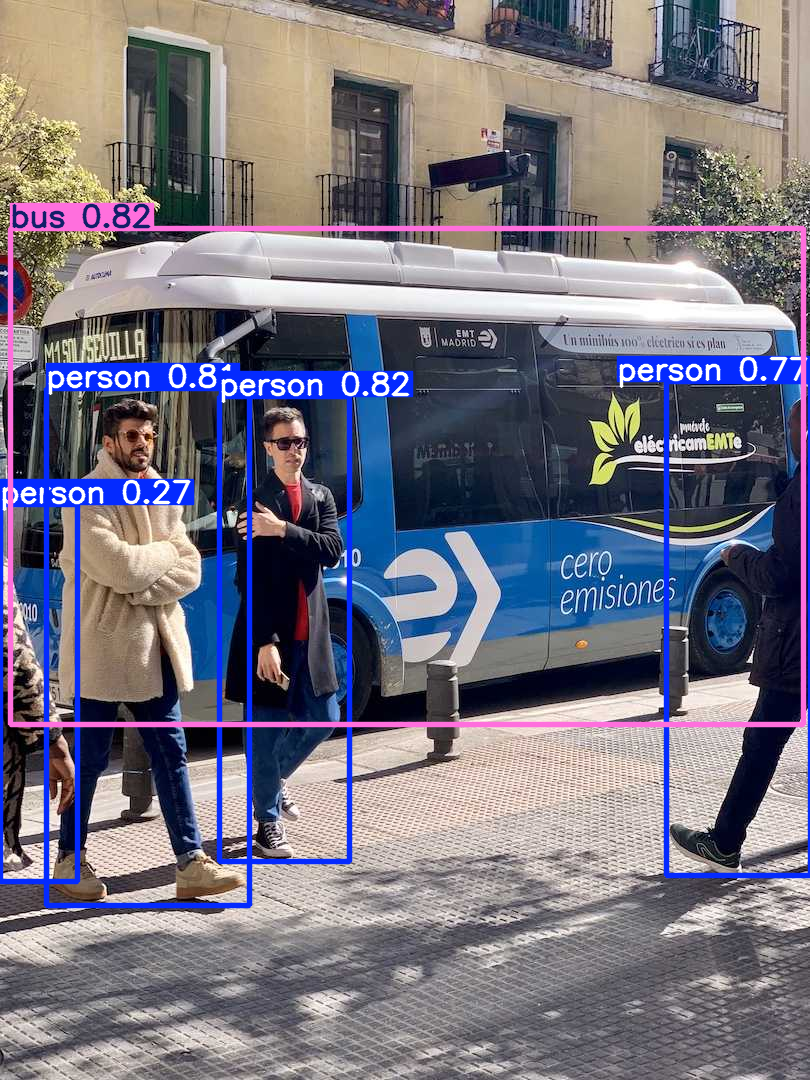

Model is working
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

In [1]:
# Test GPU
!nvidia-smi

# Install Packages
!pip -q install ultralytics opencv-python matplotlib kagglehub torch

# Import & check CUDA
import torch, os, glob
print("CUDA available:", torch.cuda.is_available())

# Download Kaggle dataset to a LOCAL path
import kagglehub
path = kagglehub.dataset_download("fatihkgg/affectnet-yolo-format")
print("Dataset path:", path)
print("Top-level contents:", os.listdir(path))

# Find the YOLO_format folder inside that download
yolo_root = os.path.join(path, "YOLO_format")
print("YOLO_format contents:", os.listdir(yolo_root))


# WRITE data.yaml
yaml_text = f"""train: {yolo_root}/train/images
val:   {yolo_root}/valid/images
test:  {yolo_root}/test/images

nc: 8
names: ["Anger","Contempt","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
"""
with open("data.yaml","w") as f:
    f.write(yaml_text)
print("Wrote data.yaml:\n", yaml_text)

# Quick sanity checks (optional but helpful)
print("Train images:", len(glob.glob(f"{yolo_root}/train/images/*")))
print("Val images:",   len(glob.glob(f"{yolo_root}/valid/images/*")))
print("Test images:",  len(glob.glob(f"{yolo_root}/test/images/*")))

# Load Model
from ultralytics import YOLO
model = YOLO("yolo11s.pt")          # detection model

# Test on sample image
results = model(data="/kaggle/input/affectnet-yolo-format", epochs=100, imgsz=224)
results[0].show()

print("Model is working")

#Train
results = model.train(data="data.yaml", epochs=100, imgsz=640, batch=16)

print(" Training started. Check the 'runs/detect/train' folder for logs/plots.")


In [2]:
from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
!ls -lh /content/runs/detect/train
!ls -lh /content/runs/detect/train/weights
!ls -lh /content/runs/detect/train


total 6.6M
-rw-r--r-- 1 root root 1.5K Nov 17 16:48 args.yaml
-rw-r--r-- 1 root root 264K Nov 17 20:34 BoxF1_curve.png
-rw-r--r-- 1 root root 250K Nov 17 20:34 BoxP_curve.png
-rw-r--r-- 1 root root 246K Nov 17 20:34 BoxPR_curve.png
-rw-r--r-- 1 root root 271K Nov 17 20:34 BoxR_curve.png
-rw-r--r-- 1 root root 269K Nov 17 20:34 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 238K Nov 17 20:34 confusion_matrix.png
-rw-r--r-- 1 root root  98K Nov 17 16:50 labels.jpg
-rw-r--r-- 1 root root  12K Nov 17 20:33 results.csv
-rw-r--r-- 1 root root 261K Nov 17 20:34 results.png
-rw-r--r-- 1 root root 433K Nov 17 16:50 train_batch0.jpg
-rw-r--r-- 1 root root 387K Nov 17 16:50 train_batch1.jpg
-rw-r--r-- 1 root root 384K Nov 17 16:50 train_batch2.jpg
-rw-r--r-- 1 root root 342K Nov 17 20:11 train_batch96210.jpg
-rw-r--r-- 1 root root 336K Nov 17 20:11 train_batch96211.jpg
-rw-r--r-- 1 root root 346K Nov 17 20:11 train_batch96212.jpg
-rw-r--r-- 1 root root 427K Nov 17 20:34 val_batch0_labels.

In [5]:
from google.colab import files
files.download("/content/runs/detect/train/results.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from google.colab import files
files.download("/content/runs/detect/train/confusion_matrix.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>